<a href="https://colab.research.google.com/github/Alejosotog/PruebaAnaliticaLDC__JohnA.SotoGomez/blob/main/PT1/AnalisisExploratorioDatos_PruebaAnalitica_Bancolombia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importe de librerías, carga de datos y exploración inicial

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import LabelEncoder

# 📥 Cargar datos
folder_path = "C:\\Users\\JOHN\\Documents\\PruebaTecnicaBancolombia202503"
file_list = ["db_file1.csv", "db_file2.csv", "db_file3.csv", "db_file4.csv", "db_file5.csv"]

df_list = [pd.read_csv(os.path.join(folder_path, file), low_memory=True, dtype=str) for file in file_list]
df = pd.concat(df_list, ignore_index=True)

# 📊 Exploración inicial
print("Dimensiones del dataset:", df.shape)
print("Tipos de datos:")
print(df.dtypes)
print("Primeras filas:")
print(df.head())

MemoryError: 

Análisis de valores nulos

In [ ]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Columna': df.columns, 'Valores_nulos': missing_values, 'Porcentaje': missing_percentage})
print("\nValores nulos por columna:")
print(missing_df.sort_values(by='Porcentaje', ascending=False))


Valores nulos por columna:
                                           Columna  Valores_nulos  Porcentaje
sociedad_ccial_civ              sociedad_ccial_civ        4703588   96.280197
tipo_contrato                        tipo_contrato        3038705   62.200838
nivel_academico                    nivel_academico        2000490   40.949073
tipo_vivienda                        tipo_vivienda        1710864   35.020568
profn                                        profn        1639867   33.567293
pais_nacim                              pais_nacim         759531   15.547236
trn_efec                                  trn_efec         632021   12.937168
trn_monto                                trn_monto         632021   12.937168
trn_oper                                  trn_oper         632021   12.937168
trn_desc_tip_cta                  trn_desc_tip_cta         632021   12.937168
trn_canal_serv_efec            trn_canal_serv_efec         632021   12.937168
ocup                                

Estadistica Descriptiva

In [ ]:
describe_df = df.describe(include='all')
print("\nEstadísticas descriptivas:")
print(describe_df)


Estadísticas descriptivas:
                         cli         tipo_cli estado_cli nivel_academico  \
count                4885312          4885312    4885312         2884822   
unique               1000000                2          3               7   
top     -1597283584108738014  PERSONA NATURAL     ACTIVO   UNIVERSITARIO   
freq                     973          4676040    4276047         1027853   

          profn      ocup        tipo_contrato genero_cli tipo_vivienda  \
count   3245445   4556024              1846607    4666979       3174448   
unique       87        14                    4          4             4   
top       OTROS  EMPLEADO  NO INFORMA/NO TIENE          M      FAMILIAR   
freq    1286732   2434880              1147665    2336822       1205286   

       pais_nacim  ...         ciiu nivel_riesgo_ciiu  sociedad_ccial_civ  \
count     4125781  ...      4606422           4591510              181724   
unique         90  ...          493                 3        

📊 Visualización de la distribución de datos

In [ ]:
numeric_cols = ['ing_mes', 'egresos_mes', 'trn_monto', 'score_riesgo_mun']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

Histogramas y KDE para cada variable numérica con escala logarítmica para mejor visualización

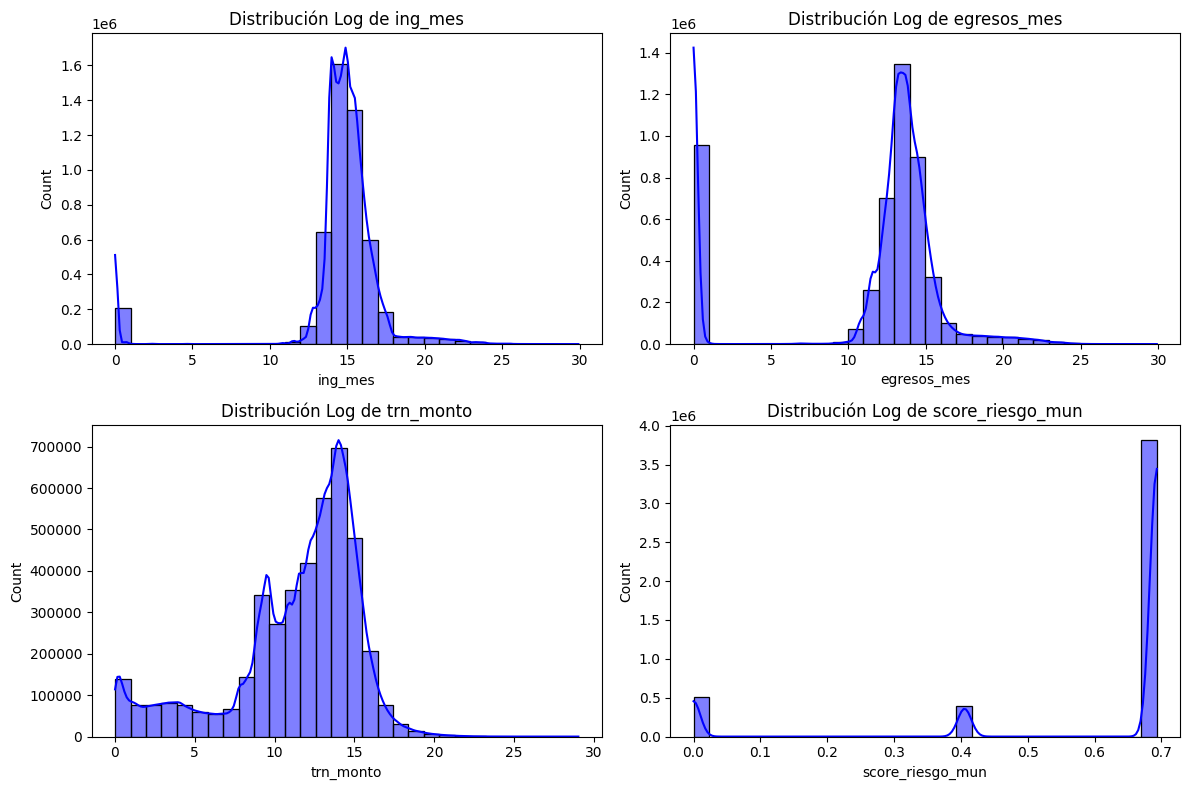

In [ ]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    if (df[col] > 0).sum() > 0:  # Evitar log de valores negativos o cero
        sns.histplot(np.log1p(df[col]), bins=30, kde=True, color='blue')
        plt.title(f'Distribución Log de {col}')
    else:
        sns.histplot(df[col], bins=30, kde=True, color='blue')
        plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

Boxplots con escala logarítmica para una mejor visualización

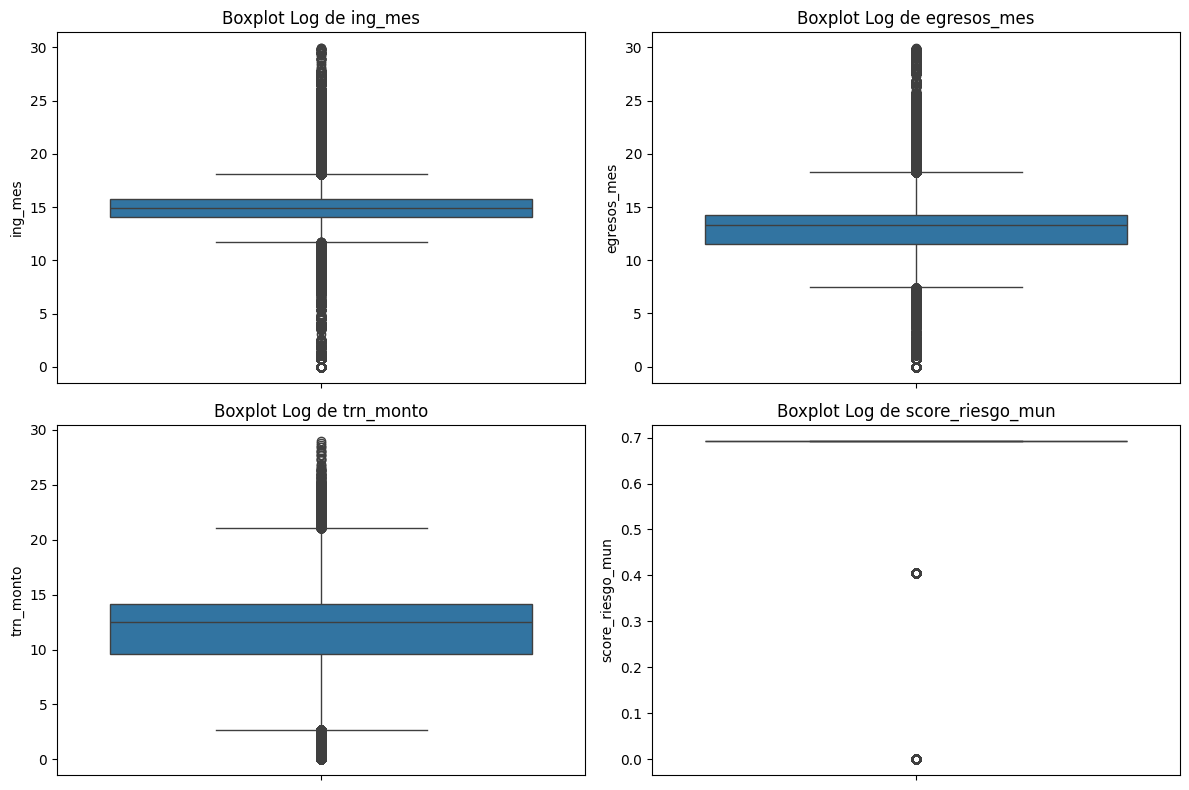

In [ ]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    if (df[col] > 0).sum() > 0:  # Aplicar log solo si hay valores positivos
        sns.boxplot(y=np.log1p(df[col]), whis=1.5)
        plt.title(f'Boxplot Log de {col}')
    else:
        sns.boxplot(y=df[col], whis=1.5)
        plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

🔄 Limpieza de datos

Convertir tipos de datos numéricos

In [ ]:
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna(subset=numeric_cols)  # Eliminar filas con valores NaN en columnas numéricas


# Eliminar duplicados
df = df.drop_duplicates()

MemoryError: Unable to allocate 829. MiB for an array with shape (23, 4723929) and data type float64

Tratameinto de valores nulos

In [ ]:
# Tratamiento de valores nulos evitando el warning
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df.loc[:, col] = df[col].fillna(df[col].median())  # Usar loc para evitar el warning
    else:
        df.loc[:, col] = df[col].fillna("Desconocido")

print("\nDatos después de limpieza:")
print(df.info())


Datos después de limpieza:
<class 'pandas.core.frame.DataFrame'>
Index: 4723929 entries, 0 to 4885311
Data columns (total 24 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   cli                       int64  
 1   tipo_cli                  float64
 2   estado_cli                float64
 3   nivel_academico           float64
 4   profn                     float64
 5   ocup                      float64
 6   tipo_contrato             float64
 7   genero_cli                float64
 8   tipo_vivienda             float64
 9   pais_nacim                float64
 10  ing_mes                   float64
 11  egresos_mes               float64
 12  origen_fondos             float64
 13  operac_moneda_extranjera  float64
 14  ciiu                      float64
 15  nivel_riesgo_ciiu         float64
 16  sociedad_ccial_civ        float64
 17  mun_res                   float64
 18  score_riesgo_mun          float64
 19  trn_desc_tip_cta          float64
 20  t

Matriz de correlación

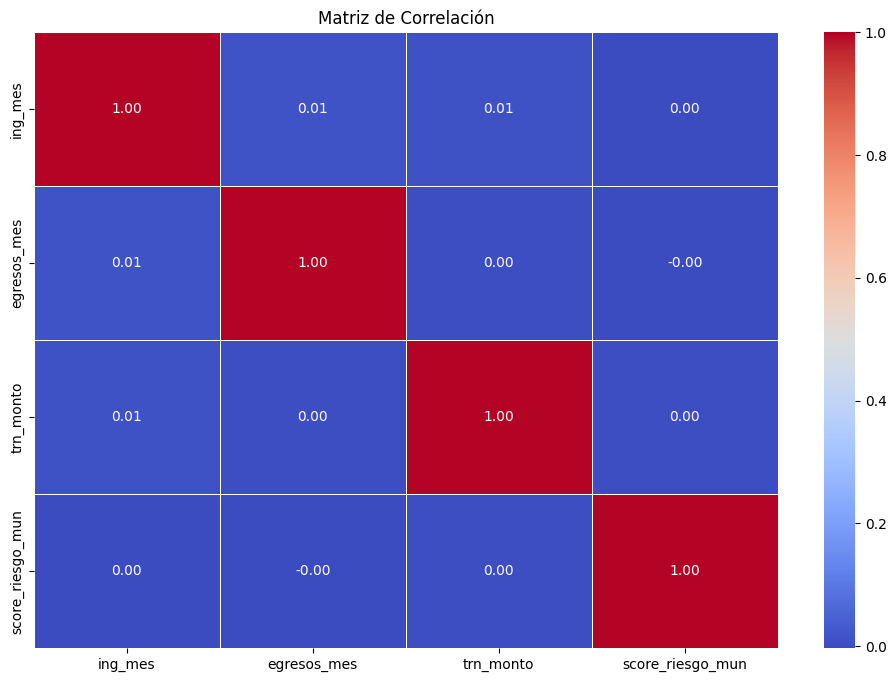

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

Guardar Dataset limpio en repositorio GIT-HUB

In [ ]:
import os

repo_path = "C:\\Users\\JOHN\\Documents\\GitHub\\PruebaAnaliticaLDC__JohnA.SotoGomez\\PT1"

# Si la carpeta no existe, crearla
if not os.path.exists(repo_path):
    os.makedirs(repo_path)

df.to_csv(os.path.join(repo_path, "dataset_limpio.csv"), index=False)
